<a href="https://colab.research.google.com/github/thanhnt19146391/study/blob/main/Prepare_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare dataset

Connect your drive with your email

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


Set your training folder which contains images

In [4]:
data_root = "/content/drive/MyDrive/Colab Notebooks/AI/CNN_Execises/Face_detection/training"

Create data generator for training and validation

In [5]:
from keras.preprocessing.image import ImageDataGenerator
IMAGE_SHAPE = (150, 150)
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR)
# Create dictionary containing rescale and validation_split
datagen_kwargs = dict(rescale = 1. / 255, validation_split = 0.2)
valid_datagen = ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    subset = "validation",
    target_size = IMAGE_SHAPE,
    shuffle = True
)
train_datagen = ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    target_size = IMAGE_SHAPE,
    subset = "training"
)

/content/drive/MyDrive/Colab Notebooks/AI/CNN_Execises/Face_detection/training
Found 643 images belonging to 21 classes.
Found 2614 images belonging to 21 classes.


Learn more about data batch

In [19]:
import numpy as np
image_batch_train, label_batch_train = next(iter(train_generator))
print('Image batch train shape: ', image_batch_train.shape)
print('Label batch train shape: ', label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(), key = lambda pair: pair[1])
dataset_labels = np.array([key.title() for key, _ in dataset_labels])
print(dataset_labels)
print("Number of classes: ",train_generator.num_classes)
print('Batch size: ',train_generator.batch_size)
print('Samples: ',train_generator.samples)

Image batch train shape:  (32, 150, 150, 3)
Label batch train shape:  (32, 21)
['Bi' 'Bo' 'Do Mixi' 'Duc' 'Dung' 'Loi' 'My Tam' 'Shark Binh'
 'Shark Dzung' 'Shark Hung' 'Shark Lien' 'Shark Linh' 'Shark Louis'
 'Shark Phu' 'Shark Viet' 'Someone' 'Thanh' 'Thuy Tien' 'Tieu Vy' 'Vinh'
 'Xemesis']
Number of classes:  21
Batch size:  32
Samples:  2614


# Training


In [12]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Flatten
# Build model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (150, 150, 3)))
model.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(train_generator.num_classes, activation = 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_6 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 360000)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               46080128  
                                                                 
 dense_7 (Dense)             (None, 21)                2709      
                                                      

Compile our model

In [18]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
model.compile(
    optimizer = Adam(),
    loss = "categorical_crossentropy",
    metrics = ['accuracy']
)

Train our model

In [20]:
hist = model.fit(
    train_generator,
    batch_size = train_generator.batch_size,
    epochs = 10,
    validation_data = valid_generator,
    validation_batch_size = valid_generator.batch_size).history

Epoch 1/10
82/82 [==============================] - 498s 6s/step - loss: 7.6500 - accuracy: 0.5604 - val_loss: 0.8044 - val_accuracy: 0.7947
Epoch 2/10
82/82 [==============================] - 232s 3s/step - loss: 0.2530 - accuracy: 0.9480 - val_loss: 0.6279 - val_accuracy: 0.8383
Epoch 3/10
82/82 [==============================] - 236s 3s/step - loss: 0.0284 - accuracy: 0.9954 - val_loss: 0.6547 - val_accuracy: 0.8600
Epoch 4/10
82/82 [==============================] - 257s 3s/step - loss: 0.0025 - accuracy: 0.9996 - val_loss: 0.6890 - val_accuracy: 0.8678
Epoch 5/10
82/82 [==============================] - 246s 3s/step - loss: 4.4481e-04 - accuracy: 1.0000 - val_loss: 0.6702 - val_accuracy: 0.8709
Epoch 6/10
82/82 [==============================] - 239s 3s/step - loss: 2.4107e-04 - accuracy: 1.0000 - val_loss: 0.6823 - val_accuracy: 0.8756
Epoch 7/10
82/82 [==============================] - 233s 3s/step - loss: 1.6654e-04 - accuracy: 1.0000 - val_loss: 0.6927 - val_accuracy: 0.8802
E

Notification

In [26]:
from google.colab import output
output.eval_js('new Audio("https://www.soundjay.com/nature/sounds/rain-01.mp3").play()')

Measure accuracy and loss after training

In [24]:
final_loss, final_accuracy = model.evaluate(valid_generator)
print('Final loss: {:.2f}'.format(final_loss))
print('Final accuracy: {:.2f}%'.format(final_accuracy * 100))

21/21 [==============================] - 13s 634ms/step - loss: 0.7094 - accuracy: 0.8725
Final loss: 0.71
Final accuracy: 87.25%


Save model

In [25]:
PATH = "/content/drive/MyDrive/Colab Notebooks/AI/"
MODEL_NAME = "Model1.h5"
model.save(PATH + MODEL_NAME)

Load saved model

# Check predictions

In [27]:
from keras.models import load_model
model = load_model(PATH + MODEL_NAME)

Get images and labels batch from vadidation generator

In [53]:
val_img_batch, val_label_batch = next(iter(valid_generator))
print('Validation imgage batch shape: ', val_img_batch.shape)
print('Validation label batch shape: ', val_label_batch.shape)

true_label_ids = np.argmax(val_label_batch, axis = 1)
print(true_label_ids)

Validation imgage batch shape:  (32, 150, 150, 3)
Validation label batch shape:  (32, 21)
[15  8  8 20 13  2  1  7 13 10  7  7 20 16  6 13 12  1  8  7 13  7  3  1
 16  1 16 20 20  2  9 14]


Calculate predictions for the entire batch

In [54]:
predictions = model.predict(val_img_batch)
print('Prediction results shape: ', predictions.shape)

Prediction results shape:  (32, 21)


Convert prediction to Pandas dataframe, for better visualizaton

In [55]:
import pandas as pd
pred_dataframe = pd.DataFrame(predictions)
pred_dataframe.columns = dataset_labels

Print images batch and label predictions

In [56]:
pred_ids = np.argmax(predictions, axis = 1)
print(pred_ids)
pred_labels = dataset_labels[pred_ids]
print(pred_labels)

[20  8  8 20 13  2  1  5 13 10  7  7 20 16  6 13 12  2  8  7 13  7  3  1
 16  1 16  7 20  2  9 14]
['Xemesis' 'Shark Dzung' 'Shark Dzung' 'Xemesis' 'Shark Phu' 'Do Mixi'
 'Bo' 'Loi' 'Shark Phu' 'Shark Lien' 'Shark Binh' 'Shark Binh' 'Xemesis'
 'Thanh' 'My Tam' 'Shark Phu' 'Shark Louis' 'Do Mixi' 'Shark Dzung'
 'Shark Binh' 'Shark Phu' 'Shark Binh' 'Duc' 'Bo' 'Thanh' 'Bo' 'Thanh'
 'Shark Binh' 'Xemesis' 'Do Mixi' 'Shark Hung' 'Shark Viet']


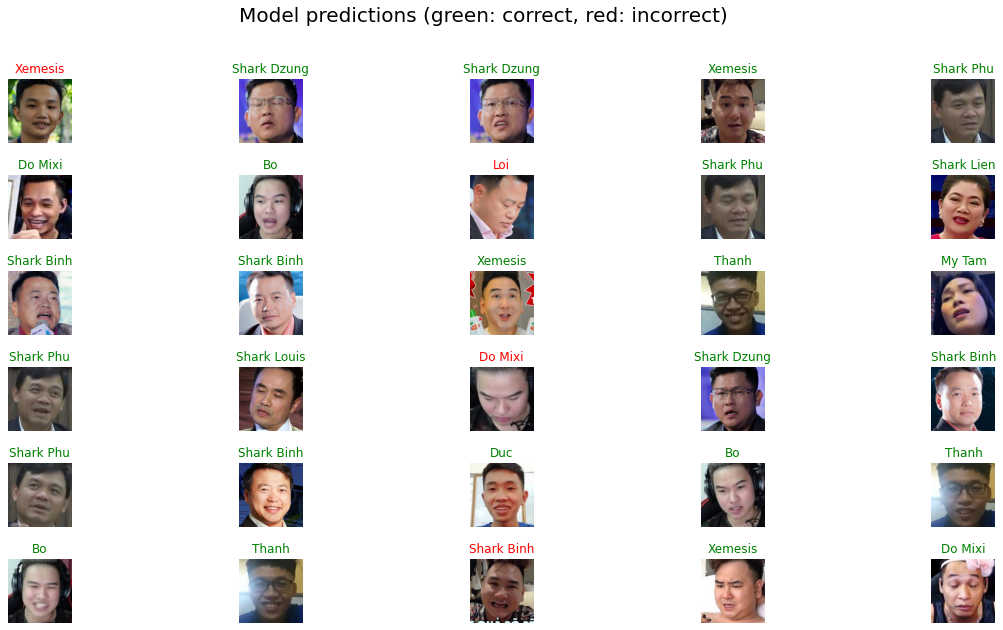

In [57]:
import matplotlib.pylab as plt
plt.figure(figsize = (20, 10))
plt.subplots_adjust(hspace = .5)
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(val_img_batch[i])
    color = "green" if true_label_ids[i] == pred_ids[i] else 'red'
    plt.title(pred_labels[i].title(), color = color)
    plt.axis('off')
_ = plt.suptitle('Model predictions (green: correct, red: incorrect)', size = 20)